DRAFT VERSION
Let's learn how to set up a gravity survey! This notebook will go through a simulation to calculate a gravitational anomaly in the subsurface. This simulation will be run in Python and use a couple libraries to help out with calculations and visualizing our survey. First and foremost, let's import the Python libraries we will need. To run the code cell, click run on the top toolbar. Or, you can click on the cell and hit "Ctrl+ENTER" or "SHIFT+ENTER"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('Code has finished running, continue reading on!')

Code has finished running, continue reading on!


Our anomaly is going to be a single point mass underground, or in the subsurface. We need to assign a value for both the background and anomalous density. In order for the point mass to be an anomaly, the density values need to be different than the majority of the surrounding material in the subsurface. The density difference does not need to be very big to show up in a survey. Let's go ahead and assign the location of our point mass and our densities.

In [38]:
## setting some of our parameters

# location of point mass anomaly
a,b,c = 0,0,-100

# density values
rho_b = 1 * 1000      # background density, kg/m^2
rho_a = 3*.1       # anomoulus density, kg/m^2

# gamma is a constant
gamma = 6.67408 * 10**(-11)    # m^3/kg*s^2

print('Code has finished running, continue reading on!')

Code has finished running, continue reading on!


In this next section, we are going to be doing a couple of different experiments with survey spacing, which is also known as discretization. Survey spacing is how far apart we want to space our measurements in the survey. To learn the importance of this idea, we are going to assume the survey is taking place over an area that lines up with northing and easting. The northing and easting system is like latitude and longitude but is in meters rather than degrees (Northing is latitude, easting is longitude). For simplicity with this synthetic survey, let's assume that our point mass is in the center of a northing/easting grid (center is at (0,0)). Our entire northing/easting grid is going to be a square shape that extends a total of 200 meters on each axis. The limits of the axes on the grid will extend from -100 to 100 meters.



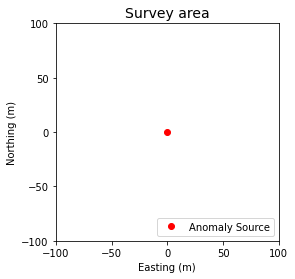


Code has finished running, continue reading on!


In [18]:
# plot the location of point mass over entire survey grid
plt.figure(figsize=(4,4))
plt.plot(0,0,'ro', label='Anomaly Source')
plt.xlim(-100,100); plt.yticks(np.arange(-100,101,50))
plt.title('Survey area',fontsize=14); plt.legend(loc='lower right')
plt.xlabel('Easting (m)'); plt.ylabel('Northing (m)')
plt.savefig('pointmass.png')
plt.show()

print('')
print('Code has finished running, continue reading on!')

Now that we have the basis for our grid, we now have to chose a parameter to discretize the grid in each direction. For right now, let's chose to do 5 meters of survey spacing in each direction.

To use the following code cell, click RUNNING INSTRUCTIONS. A prompt will pop up to ask you to input a survey spacing, type in "5" (no quotation marks), and hit ENTER. Do this for both prompts that pop up. After you hit ENTER for the second question, the variable is saved and you can move on to the next step.

In [5]:
# step of the function (survey spacing)
dx_1 = int(input('Enter survey spacing in the x direction (easting) and press enter: '))
dy_1 = int(input('Enter survey spacing in the y direction (northing) and press enter: '))
print('')
print('Code has finished running, continue reading on!')

Enter survey spacing in the x direction (easting) and press enter: 1
Enter survey spacing in the y direction (northing) and press enter: 1

Code has finished running, continue reading on!


The next block of code takes in all of the variables/information that we entered above and calculates a gravity anomaly. If you are interested in the calculation of the gravity anomaly, keep reading (otherwise skip to the bottom of this PARAGRAPH). To calculate the gravity anomaly, we need to utilize vectors. EXPLAIN WHAT A VECTOR IS. The vectors tell us important information based on where we are observing the gravity that we will use in the calculation. The distance between us and the point we are measuring plays an important role in the gravity calculation. INSERT GRAVITY EQUATION. As we can see in the equation, the closer to the anomaly we are, the bigger the measurement is going to be. 

Another important factor that we will consider is how many measurements we will take. This is determined by the survey spacing. If we have more measurements, we will have more data to determine the gravity anomaly. This is synonymous with increasing the discretization. Let's examine how our survey spacing will affect our resolution, or how well we can create an image of our anomaly based on how many measurements we take.

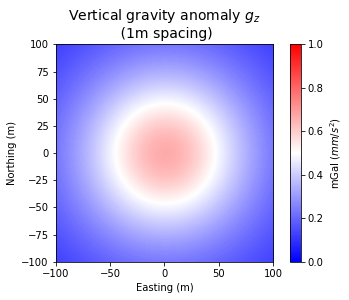


Code has finished running, continue reading on!


In [28]:
def output_grav(dx, dy):
    ## input obs location and prism parameters
    north_grid = np.arange(-100, 100, dx)
    east_grid = np.arange(-100, 100, dy)
    x, y = np.meshgrid(north_grid, east_grid)   # northing (y) and easting (x), both in m
    
    z_prime = 0  # observing our anomaly on the surface

    # making R a lambda function
    R = lambda x_prime, y_prime, z_prime: np.sqrt((x-x_prime)**2 + (y-y_prime)**2 + (c-z_prime)**2)

    gravity = gamma * (rho_b-rho_a) * (z_prime - c) * 1e12 / R(0,0,0)**3

    return gravity

gravity = output_grav(dx_1, dy_1)

# colormap either bwr or coolwarm
plt.imshow(gravity, cmap='bwr', extent=[-100,100,-100,100], vmin=0, vmax=1)
# , vmin=-2e-12, vmax=2e-12
plt.colorbar(label='mGal $(mm/s^2)$'); plt.title('Vertical gravity anomaly $g_{z}$\n (1m spacing)', fontsize=14)
plt.xlabel('Easting (m)'); plt.ylabel('Northing (m)')
plt.savefig('1m_res.png')
plt.show()

print('')
print('Code has finished running, continue reading on!')

The image of the anomaly looks pretty good, right? Let's see what happens when we change the survey spacing to a bigger number. Now, when prompted, enter in 50 as our survey spacing.

Enter survey spacing in the x direction (easting) and press enter: 25
Enter survey spacing in the y direction (northing) and press enter: 25


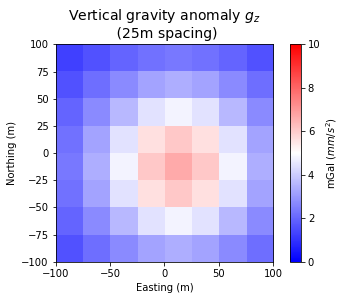


Code has finished running, continue reading on!


In [41]:
# step of the function (survey spacing)
dx_25 = int(input('Enter survey spacing in the x direction (easting) and press enter: '))
dy_25 = int(input('Enter survey spacing in the y direction (northing) and press enter: '))

gravity = output_grav(dx_25, dy_25)

# colormap either bwr or coolwarm
plt.imshow(gravity, cmap='bwr', extent=[-100,100,-100,100], vmin=0, vmax=10)
plt.colorbar(label='mGal $(mm/s^2)$'); plt.title('Vertical gravity anomaly $g_{z}$\n (25m spacing)', fontsize=14)
plt.xlabel('Easting (m)'); plt.ylabel('Northing (m)')
plt.savefig('fig_density.png')
plt.show()

print('')
print('Code has finished running, continue reading on!')

When comparing the two plots, the image looks a lot different! The 50 m survey spacing looks a lot blockier than the 5 m spacing. Because we are taking less data points for the 50 m survey spacing, the resolution of our image is not very good. The resolution of our image for the 5 m spacing looks a lot better, but now we need to consider how realistic it is to collect a large number of data points to get a well-resolved image. 

In the field, it takes time to set up the survey, and this includes measuring out where to take measurements (and taking GPS points), performing instrument-specific preparations, and actually taking the measurement. At best, let's assume it would take at least 5 minutes to set up and run the instrument at one survey point. Let's calculate how long it would take to finish the 5 m and 50 m survey spacings.

In [21]:
def survey_time(dx, dy):
    north_grid = np.arange(-100, 100, dx)
    east_grid = np.arange(-100, 100, dy)
    
    num_pts = (len(north_grid)+1)*(len(east_grid)+1)
    time = num_pts*5/60      # each survey takes 5 minutes, convert to hours
    print('Number of survey points: ',num_pts)
    print('Time to complete survey (hours): ',np.round(time,2))
    return

survey_time(dx_1, dy_1)
survey_time(dx_25, dy_25)

Number of survey points:  40401
Time to complete survey (hours):  3366.75
Number of survey points:  81
Time to complete survey (hours):  6.75


That's a long time to complete both surveys! The surveys are realistically going to be longer because of certain factors like the time it would take to walk between surveys and needing to take measurements for future corrections. Every couple of hours, you also have to take measurements at a "base station" and that is because for our measurements to be accurate, we need "absolute gravity" measurements. We won't discuss this concept more right now, but it is something to consider when we think about realistic timing of a survey.

Now is a chance to play around with your own survey spacings! The following code cell will ask you if you want to simulate a survey, and if you do, you can put any survey spacing you want. You can chose different values for the northing and easting survey spacing, but make sure to keep the number between 0 and 100 for both. 

Would you like to simulate a survey? Yes or no? y
Enter survey spacing in the x direction (easting) and press enter: 25
Enter survey spacing in the y direction (northing) and press enter: 25


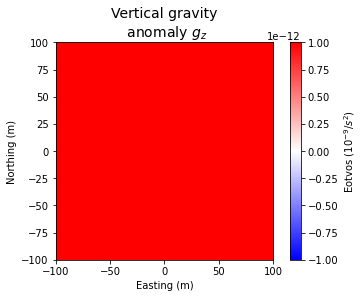

Number of survey points:  81
Time to complete survey (hours):  6.75
Would you like to simulate another survey? Yes or no? n

Code has finished running, restart simulation or continue reading on!


In [37]:
answer = input('Would you like to simulate a survey? Yes or no? ')

while answer == 'Yes' or 'yes' or 'y':
    # step of the function (survey spacing)
    dx = int(input('Enter survey spacing in the x direction (easting) and press enter: '))
    if dx <= 0 or dx > 100:
        print('Invalid value, exiting simulation')
        break
        
    dy = int(input('Enter survey spacing in the y direction (northing) and press enter: '))
    if dy <= 0 or dy > 100:
        print('Invalid value, exiting simulation')
        break
        
    gravity = output_grav(dx, dy)

    # colormap either bwr or coolwarm
    plt.imshow(gravity, cmap='bwr', extent=[-100,100,-100,100], vmin=-1e-12, vmax=1e-12)
    plt.colorbar(label='Eotvos $(10^{-9}/s^2)$'); plt.title('Vertical gravity\n anomaly $g_{z}$', fontsize=14)
    plt.xlabel('Easting (m)'); plt.ylabel('Northing (m)')
    plt.show()
    
    survey_time(dx,dy)
    
    answer = input('Would you like to simulate another survey? Yes or no? ')
    
    if answer == 'No' or 'no' or 'n':
        break

print('')
print('Code has finished running, restart simulation or continue reading on!')

In [ ]:
# plot the location of point mass over entire survey grid
plt.figure(figsize=(4,4))
square = plt.Rectangle((-10,-10),20,20, fc='r', label='Anomaly source')
plt.gca().add_patch(square)
plt.xlim(-100,100); plt.yticks(np.arange(-100,101,50))
plt.title('Survey area',fontsize=14); plt.legend(loc='lower right')
plt.xlabel('Easting (m)'); plt.ylabel('Northing (m)')
plt.savefig('squaremass.png')
plt.show()